<h1 align="center">Lab 4: Implementation of Decision Trees for Classification</h1>

## Fitting and Visualizing a Decision Tree Model

**(1) Import Packages**

**NOTE: The `scikit-learn` (`sklearn`) Python machine learning library provides an implementation of Decision Tree**

In [ ]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package to visualize Decision Tree
from sklearn import tree

%matplotlib inline

**(2) Import Data**

In [ ]:
mower_df = pd.read_csv('RidingMowers.csv')
mower_df

**(3) Selecting data correponding to Input Features `X` and Outcome `y`**

In [ ]:
X = mower_df.drop(columns = ['Ownership']) # Using Columns: Income, Lot_Size
y = mower_df['Ownership']

display(X.head())
display(y.head())

**(4) Fit the Decision Tree model on data $(X,y)$**

In [ ]:
classTree = DecisionTreeClassifier(random_state = 0)
classTree.fit(X,y)

**(5) Generate visualization of the Decision Tree using `plot_tree`**

In [ ]:
classTree.classes_

In [ ]:
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(decision_tree = classTree,  # Tree to be plotted
                   max_depth = None,           # Maximum depth of the representation.
                   feature_names = X.columns,
                   class_names = classTree.classes_,
                   filled = True)

<h3 align="center">Type of Information in a Node</h3>

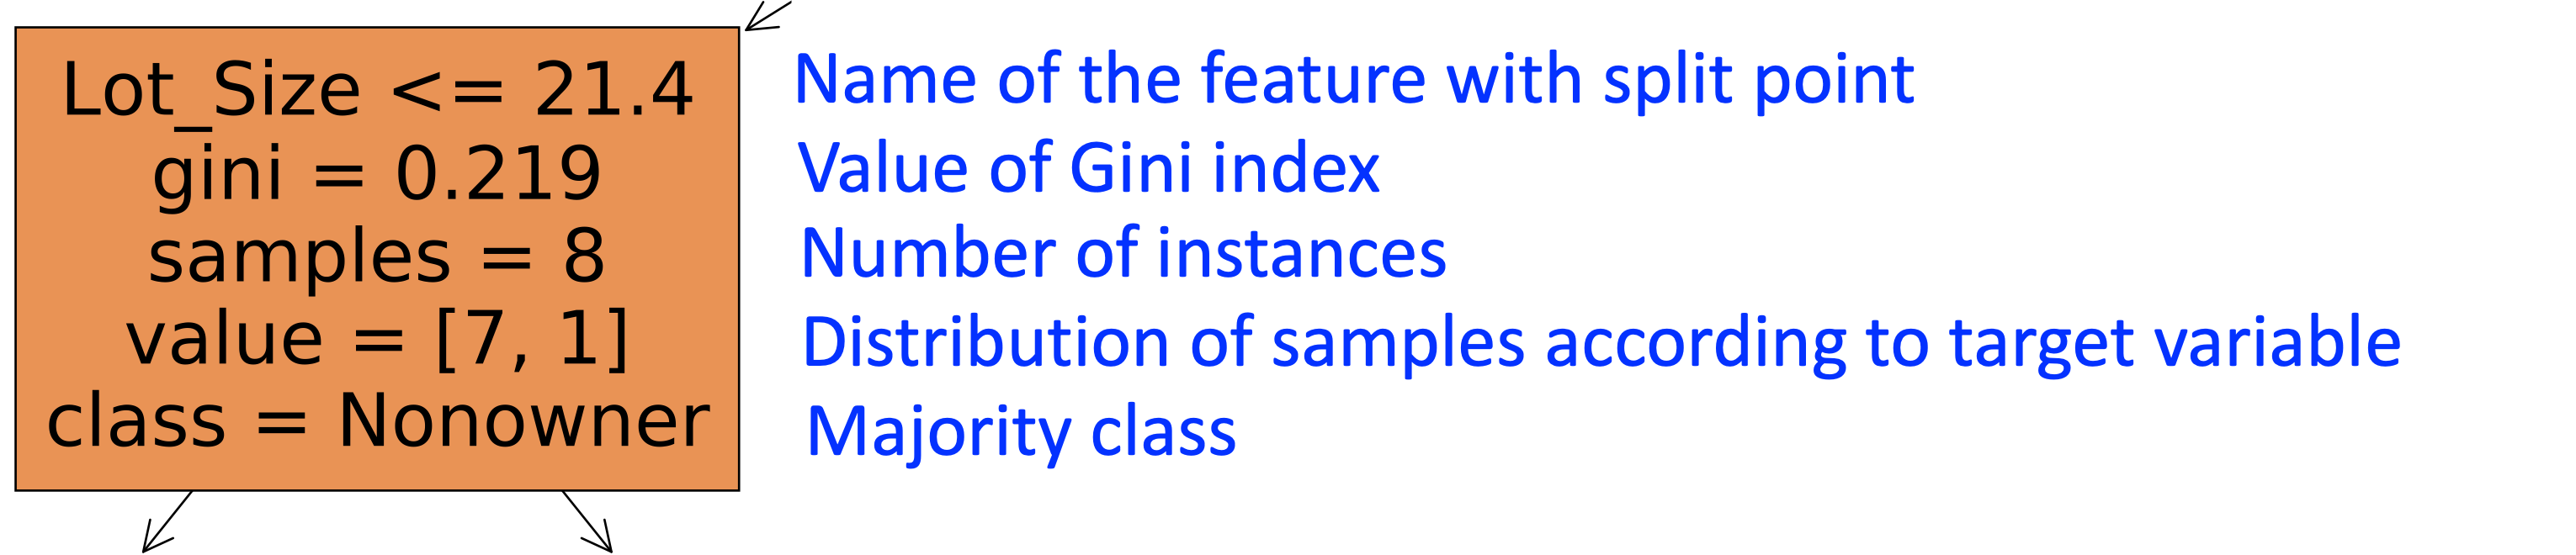

**Observations**

- Nodes are orange in color if the majority class is non-owner
- Nodes are blue in color if the majority class is owner
- Greater the purity of a node (lower gini value), darker will be its shade

**(6) Save Decision Tree on your local machine**

In [ ]:
fig.savefig("decision_tree.pdf", bbox_inches='tight')

# Case Study: Predicting the Acceptance of Personal Loan

<img src="https://rigidfinance.com/wp-content/uploads/2022/03/personal-loan.jpg" width=600 height = 280 />

Data to be used: *Bank_Data.csv*

Following is the description of columns in *Bank_Data.csv* file

<TABLE CAPTION="Personal Loan Dataset">
<TR><TD><B>Variable</B></TD><TD><B>Description</B></TD></TR>
<TR><TD>Age</TD><TD>Customer's age</TD></TR>
<TR><TD>Experience</TD><TD># years of professional experience</TD></TR>
<TR><TD>Income</TD><TD>Annual income of the customer (&#36;000)</TD></TR>
<TR><TD>Family</TD><TD>Family size of the customer</TD></TR>
<TR><TD>CCAvg</TD><TD>Avg. spending on credit cards per month (&#36;000)</TD></TR>
<TR><TD>Education</TD><TD>Education Level. Undergrad; Graduate; Advanced/Professional</TD></TR>   
<TR><TD>Mortgage</TD><TD>Value of house mortgage if any. (&#36;000)</TD></TR>
<TR><TD>Securities Account</TD><TD>Does the customer have a securities account with the bank?</TD></TR>
<TR><TD>CD Account</TD><TD>Does the customer have a certificate of deposit (CD) account with the bank?</TD></TR>
<TR><TD>Online</TD><TD>Does the customer use internet banking facilities?</TD></TR>
<TR><TD>CreditCard</TD><TD>Does the customer use a credit card issued by the bank?</TD></TR>
<TR><TD>Personal Loan (outcome)</TD><TD>Did this customer accept the personal loan offered in the campaign?</TD></TR>
</TABLE>

In `Personal Loan` Column:

- 0: Did not accept loan
- 1: Accepted loan

## Import Packages

In [ ]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

%matplotlib inline

## Import Data

In [ ]:
# Import Data
bank_df = pd.read_csv('Bank_Data.csv')
bank_df.head()

In [ ]:
# Summary of the data
bank_df.info()

In [ ]:
# Distribution of Personal Loan column
bank_df['Personal Loan'].value_counts()

**NOTE**: Among 5000 customers, only 480 (= 9.6\%) accepted the personal loan.

This is an example of **Imbalanced Dataset** where the distribution of instances across the classes is not equal.

## Applying Decision Tree Model to Dataset using Hold-out Sampling Approach

### Step 1: Selecting data correponding to Input Features `X` and Outcome `y`



In [ ]:
X = bank_df.drop(columns = ['Personal Loan'])
y = bank_df['Personal Loan']

### Step 2: Dealing with Categorical Variables

**Categorical variables are those which can take values from a finite set.**

- Using the **one-hot encoding method**, a new dummy/indicator variable is created for each categorical variable to represent the presence (1) or absence (0) of the categorical variable.

- `pd.get_dummies()` allows us to create dummy variables. See this [link](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)
   - By default, it takes the columns with data-type ‘object’.
   - It then encodes them and returns a new dataframe with new columns that replace the old categorical column.

In [ ]:
cat_var = ['Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
X_encoded = pd.get_dummies(X, columns = cat_var)

In [ ]:
X_encoded.head()

In [ ]:
y.head()

### Step 3: Data Partitioning into train and test sets

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.3, random_state = 1)

Note: As a result of data partitioning, you will have four subsets of data: 2 sets for `X_encoded` (`train_X`, `test_X`) and 2 sets for `y` (`train_Y`, `test_Y`).

**Two main things to focus here:**
1. `test_size`
2. `random_state`

`random_state` is basically used for reproducing the problem every time you run the code.

If you do not use a `random_state` in `train_test_split`, every time you make the split you might get a different set of train and test data points.

### Step 4: Fitting Decision Tree Model on Train Set

In [ ]:
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(train_X, train_y)

### Step 5: Visualizing Decision Tree

In [ ]:
fig = plt.figure(figsize = (25,20))
a = tree.plot_tree(decision_tree = clf,
                   max_depth = None,
                   feature_names = train_X.columns,
                   class_names = ['Reject', "Accept"],
                   filled = True)

In [ ]:
# Saving Decision Tree
#fig.savefig("bank_decision_tree.pdf", bbox_inches='tight')



### Evaluating the Performance of Decision Tree Classification Model

**Confusion Matrix**

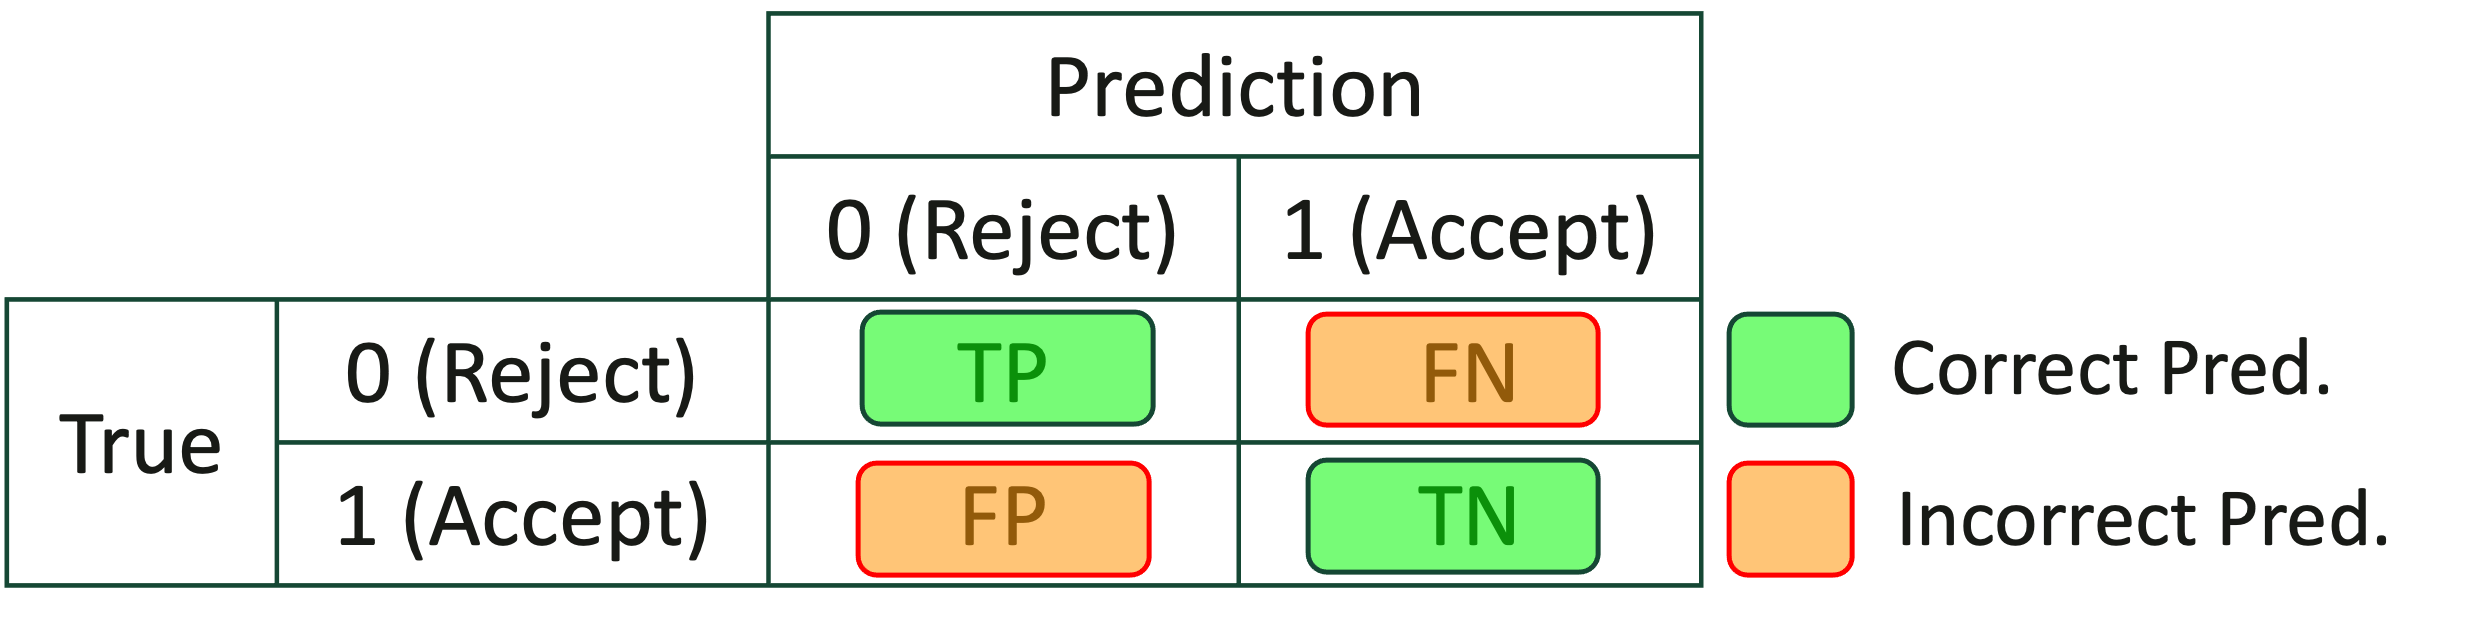

**Train Set**

To make the predictions using the trained model, use `predict()` function.

`predict()` takes the input data (data corresponding to input features) as an argument.

In [ ]:
# First make predictions on train set
y_pred_train = clf.predict(train_X)

# Now generate confusion matrix
cm = confusion_matrix(train_y, y_pred_train, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size and font size
fig, ax = plt.subplots(figsize = (6, 6))
plt.rcParams.update({'font.size': 15})

# Display Confusion Matrix
disp.plot(cmap = 'OrRd', ax = ax);

**Choosing Colormaps in Matplotlib**: [**Check this link**](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

**Test Set**

In [ ]:
# Predictions on test set
y_pred = clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
# Using better labels instead of 0 and 1
# disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Reject', "Accept"])

# Specify figure size
fig, ax = plt.subplots(figsize = (6, 6))

# Display Confusion Matrix
disp.plot(cmap = 'Purples', ax = ax);

# **Accuracy**

# $Accuracy = \frac{\# \ correct \ predictions}{Total \ predictions} = \frac{1335+132}{1335+132+16+17} = 0.98$
---

# **Precision**

# $p = \frac{TP}{TP+FP}$,  $p(0) = \frac{1335}{1335+17} = 0.99$, $p(1) = \frac{132}{132+16} = 0.89$
---
# **Recall**

# $r = \frac{TP}{TP+FN}$,  $r(0) = \frac{1335}{1335+16} = 0.99$, $r(1) = \frac{132}{132+17} = 0.89$
---
# **F1 Score**

# $f_1 = \frac{2pr}{p+r}$,  $f_1(0) = 0.99$, $f_1(1) = 0.89$
---

In [ ]:
# Generating Classification Report
print("Classification Report - \n",
      classification_report(test_y, y_pred))

In [ ]:
# Printing prediction results
result = pd.DataFrame({'Predicted': y_pred, 'Actual': test_y})
display(result.head(20))

## Prediction Probabilities

In [ ]:
# Getting prediction probabilites
prob = clf.predict_proba(test_X)

# Printing prediction results
result = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

# Creating columns for rejection and acceptance prob.
result[['Prob. of Reject (0)','Prob. of Accept (1)']] = pd.DataFrame(prob.tolist(), index = result.index)

display(result.tail(20))
# Saving dataframe as a csv file
result.to_csv('Prediction Results.csv', index = False)

## Feature Importance

Degree of **usefulness** of a specific input feature for a current model and prediction

*We will see the process of calculating Feature Importances in the next lecture*

In [ ]:
# Storing importance values from the best fit model
importance = clf.feature_importances_

In [ ]:
# Displaying feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

feature_imp

In [ ]:
# Bar plot
plt.figure(figsize=(10, 5), dpi = 100)
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title("Feature Importance");